# Introduction
The purpose of this practical session is to implement a first machine learning model on a regression problem using RidgeRegression and `sklearn`. The dataset we will used is the california housing dataset since well known boston house dataset as ethical issues.

This dataset consists in a description of houses by 8 features, each house being associated to a measure of its price. The goal here is to predict the price of an house given its description.
## The dataset
 1. Import the dataset from sklearn and check the documentation.


In [1]:
from sklearn.datasets import fetch_california_housing
help(fetch_california_housing)

Help on function fetch_california_housing in module sklearn.datasets._california_housing:

fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)
    Load the California housing dataset (regression).
    
    ==============   ==============
    Samples total             20640
    Dimensionality                8
    Features                   real
    Target           real 0.15 - 5.
    ==============   ==============
    
    Read more in the :ref:`User Guide <california_housing_dataset>`.
    
    Parameters
    ----------
    data_home : str, default=None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    download_if_missing : bool, default=True
        If False, raise a IOError if the data is not locally available
        instead of trying to download the data from the source site.
    
    return_X_y : bool, default=False

In [3]:
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

2. Now, we want to import the dataset into two variables, namely `X` and `y`. `X` will contains the description of data, `y` the outputs associated to each data. Check the dimensions of the two variables

In [2]:
#load data
# X,y = ...
y = fetch_california_housing()["target"]
X=fetch_california_housing()["data"]

## Data analysis

Now we will explore our dataset. 

1. First, plot an histogram of `y` values to check its distribution.You can have a look at `hist` function of matplotlib.pyplot module   

Text(0.5, 1.0, 'Distribution of target')

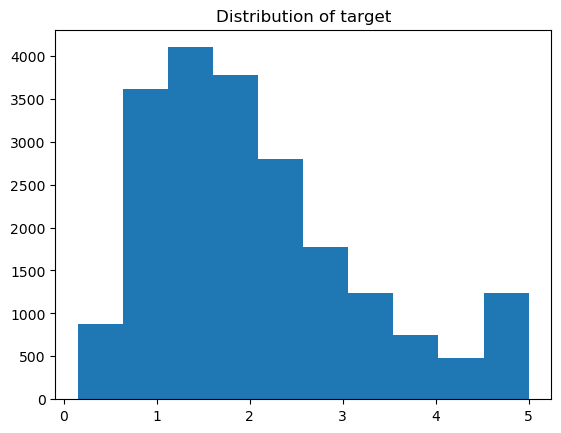

In [4]:
import matplotlib.pyplot as plt

plt.hist(y)
plt.title("Distribution of target")

2. Second, we will check the 13 features included in `X`. Compute mean and standard deviation independantly for each feature.


In [6]:
import pandas as pd
X=pd.DataFrame(X, columns=fetch_california_housing()["feature_names"])
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


3. Check this information globally using the `boxplot` function from matplotlib.pyplot

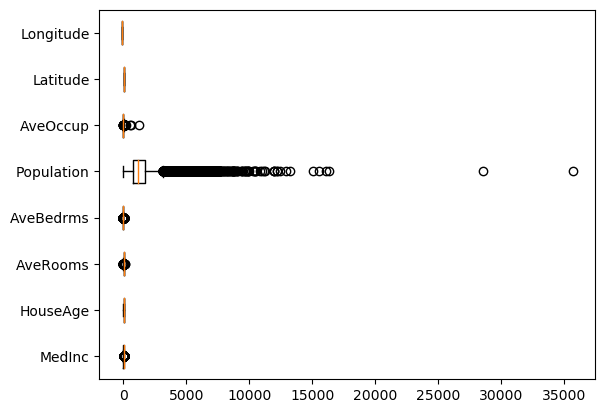

In [11]:
plt.boxplot(X.T, vert=False)
plt.yticks(range(1,len(X.columns)+1),X.columns);

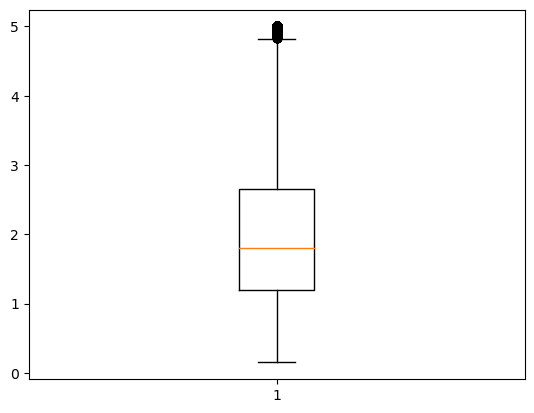

In [12]:
plt.boxplot(y);

4. What do you conclude from this first step ?

From histogram i got that maximum value of target is approximately equal to 4000 and minimum value of target is approximately 500.
Here there are 8 columns,firstly i used pandas, i wrote X.descripe() and i got all statictical informations about these features.
At last from boxplots we can see that some columns do not have outliers i mean 3 columns do not have outliers.

# Machine Learning
## Protocol

Before starting to learn a model, we have to use a clear and as much as possible unbiased protocol to evaluate our model. This protocol starts by splitting the data into two sets. The first one will be used to learn the parameters of our model, the second one will be used to evaluate the performance of our learning step.

1. Split the data into two subsets using the `train_test_split` method from `sklearn.model_selection` module. Use the split ratio of your choice.

In [90]:
#Split data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33, random_state=0)

## Normalization
2. Now we should normalize the data according to the observation made in the first section. Take care of not using the test set to compute the parameters required to normalize the data. Compute `X_train_norm` and `X_test_norm` correspondong normalized data `X_train` and `X_test` respectively.

In [172]:
#Scale data
#Mean and std must be evaluated on train to avoid bias
def standard_scaler(data):
    for col in data.columns:
        for row in data[col]:
            row=((row-data[col].mean())/data[col].std())
    return data
X_scale_train=standard_scaler(X_train)
#apply scale to X_test
X_scale_test=standard_scaler(X_test)

In [173]:
X_scale_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14069,2.4297,33.0,3.956597,1.026042,1250.0,2.170139,32.76,-117.12
17482,4.6806,23.0,5.674419,1.051878,1467.0,2.624329,34.44,-119.81
7362,1.9485,27.0,3.080423,1.028571,3559.0,3.766138,33.97,-118.19
19526,3.9886,16.0,5.469613,0.988950,1776.0,2.453039,37.65,-120.97
8365,3.2708,26.0,4.269802,1.066832,1130.0,2.797030,33.97,-118.35
...,...,...,...,...,...,...,...,...
13123,4.4125,20.0,6.000000,1.045662,712.0,3.251142,38.27,-121.26
19648,2.9135,27.0,5.349282,0.933014,647.0,3.095694,37.48,-120.89
9845,3.1977,31.0,3.641221,0.941476,704.0,1.791349,36.58,-121.90
10799,5.6315,34.0,4.540598,1.064103,1052.0,2.247863,33.62,-117.93


In [174]:
X_scale_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...,...
14366,4.1806,44.0,6.470046,1.055300,513.0,2.364055,32.74,-117.23
14583,3.5606,30.0,4.851695,1.108051,1272.0,2.694915,32.84,-117.18
16212,3.1845,47.0,4.761905,0.963585,922.0,2.582633,37.96,-121.32
6944,3.5000,37.0,4.635036,0.992701,1092.0,3.985401,33.98,-118.09


3. Another way to do is to use the `StandardScaler` class from `sklearn.preprocessing` module.

In [91]:
from sklearn.preprocessing import StandardScaler
X_train_norm = StandardScaler().fit_transform(X_train) 
y_train_norm = StandardScaler().fit_transform(y_train.reshape(-1,1))
X_test_norm = StandardScaler().fit_transform(X_test)
y_test_norm = StandardScaler().fit_transform(y_test.reshape(-1,1))

## A first model
Now our data is normalized we can try to learn our first model in a naive approach. We will use the `Ridge` class from `sklearn.linear_model` which implements the Ridge Regression scheme seen during our lessons.
1. Learn a first model using `Ridge` class and `X_train_norm`.
2. What is the default $\lambda$ defined by the `Ridge` class ?

In [92]:
#First Ridge without scaling and cv
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [93]:
ridge.score(X_train,y_train)

0.6106651395124618

In [94]:
ridge.score(X_test,y_test)

0.5957631570661486

In [95]:
ridge.alpha

1.0

3. Train your model on `X_train_norm` and predict the same data. Compute the mean average error (MAE)

In [96]:
ridge.fit(X_train_norm,y_train_norm)

Ridge()

In [97]:
ridge.score(X_train_norm,y_train_norm)

0.610665102536451

In [98]:
from sklearn.metrics import mean_absolute_error
y_pred_train=ridge.predict(X_train_norm)
mean_absolute_error(y_train_norm,y_pred_train)

0.4595601477008113

4. Now predict on `X_test_norm` and measure the MAE. What do you observe ?

In [99]:
ridge.score(X_test_norm,y_test_norm)

0.5961125483260756

In [100]:
y_pred_test=ridge.predict(X_test_norm)
mean_absolute_error(y_test_norm,y_pred_test)

0.461470085494359

Test and train scores are differed a little bit.

## Model parameters
Both fit to data and regularization terms have an effect on our model parameters $\mathbf{w}$.
1. Print and plot the coefficients $\mathbf{w}$. There are available from your instance of `Ridge` class.

[[ 0.72991319  0.1026037  -0.23003288  0.25033975 -0.00789217 -0.02395084
  -0.75951912 -0.73655899]]


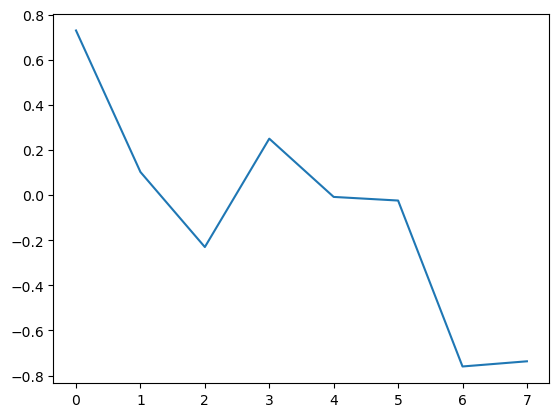

In [101]:
print(ridge.coef_)
plt.plot(ridge.coef_.T)

2. Change the $\lambda$ value of your parameter to 1000. Retrain your model, recompute the prediction error. What do you observe ? 

Be careful, in `sklearn` $\lambda$ parameter is denoted as $\alpha$

In [102]:
ridge1000=Ridge(alpha=1000)

In [103]:
ridge1000.fit(X_train_norm,y_train_norm)

Ridge(alpha=1000)

In [104]:
ridge1000.score(X_train_norm,y_train_norm)

0.5856390756536678

In [105]:
y_pred_train1000=ridge1000.predict(X_train_norm)
mean_absolute_error(y_train_norm,y_pred_train1000)

0.4773159995334937

In [106]:
ridge1000.score(X_test_norm,y_test_norm)

0.5691545592810134

In [107]:
y_pred_test1000=ridge1000.predict(X_test_norm)
mean_absolute_error(y_test_norm,y_pred_test1000)

0.4804942252194657

Mean absolute errors are increased

3. Now check your model parameters and compared them to your model when $\lambda = 1$. What do you conclude ?

In [108]:
print("When lambda = 1")
print(f"Mean absolute error: {mean_absolute_error(y_test_norm,y_pred_test)}")
print("When lambda = 1000")
print(f"Mean absolute error: {mean_absolute_error(y_test_norm,y_pred_test1000)}")

When lambda = 1
Mean absolute error: 0.461470085494359
When lambda = 1000
Mean absolute error: 0.4804942252194657


In [109]:
ridge1000.get_params()

{'alpha': 1000,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [110]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

<h3 style="color:red">Only alpha is changed<h3>

## Finding the best $\lambda$
Since $\lambda$ may have a strong effect on your model performance, we need to find the best possible value according to the dataset we work on. 
1. Try different values for $\lambda$ and evaluate the performances. Use a log scale of values between $10^{-3}$ to $10^{4}$ , i.e. `alphas = np.logspace(-3,4,10)`.

In [111]:
import numpy as np
mae_train = []
mae_test = []
coefs = []
alphas = np.logspace(-3,4,10)
for alpha in alphas:
    ridge_alpha = Ridge(alpha=alpha)
    ridge_alpha.fit(X_train_norm, y_train_norm)
    y_pred_train=ridge_alpha.predict(X_train_norm)
    mae_train.append(mean_absolute_error(y_train_norm,y_pred_train))
    y_pred_test = ridge_alpha.predict(X_test_norm)
    mae_test.append(mean_absolute_error(y_test_norm,y_pred_test))
    coefs.append(ridge_alpha.coef_)


In [112]:
alphas

array([1.00000000e-03, 5.99484250e-03, 3.59381366e-02, 2.15443469e-01,
       1.29154967e+00, 7.74263683e+00, 4.64158883e+01, 2.78255940e+02,
       1.66810054e+03, 1.00000000e+04])

In [113]:
mae_train

[0.459565464120599,
 0.45956543698671787,
 0.45956527433646416,
 0.4595643067379952,
 0.4595586137604112,
 0.45952746131604144,
 0.4594526176446621,
 0.4620429423197097,
 0.4906166530171619,
 0.5792939155406569]

In [114]:
mae_test

[0.46146867344834813,
 0.4614686804736128,
 0.46146872259630656,
 0.46146897537881093,
 0.46147050021243247,
 0.46148222955100726,
 0.46165483192845636,
 0.46478851179089054,
 0.4941079619562992,
 0.5836991861394631]

In [115]:
coefs

[array([[ 0.72993777,  0.10252171, -0.23016034,  0.25052117, -0.00792302,
         -0.02394053, -0.76030852, -0.737354  ]]),
 array([[ 0.72993765,  0.10252212, -0.2301597 ,  0.25052026, -0.00792286,
         -0.02394058, -0.76030457, -0.73735002]]),
 array([[ 0.72993692,  0.10252458, -0.23015589,  0.25051483, -0.00792194,
         -0.02394089, -0.76028088, -0.73732617]]),
 array([[ 0.72993252,  0.10253933, -0.230133  ,  0.25048223, -0.00791639,
         -0.02394275, -0.7601389 , -0.73718318]]),
 array([[ 0.72990595,  0.10262758, -0.22999562,  0.25028678, -0.00788319,
         -0.02395384, -0.75928912, -0.73632735]]),
 array([[ 0.72973888,  0.10315131, -0.22916488,  0.24911271, -0.00768601,
         -0.02401969, -0.75424303, -0.73124444]]),
 array([[ 0.72848476,  0.10610868, -0.22396651,  0.24201689, -0.00656788,
         -0.02439143, -0.72562089, -0.70238436]]),
 array([[ 0.71577018,  0.11892099, -0.19019934,  0.20080506, -0.00161599,
         -0.02598945, -0.59653598, -0.57161382]]),


 2. What is the best value for $\lambda$ ? 

<h3 style="color:red">last one is the best : alpha = 10000.0<h3>

3. Plot the different values of $\mathbf{w}$ parameters for each $\lambda$ values. Discuss.


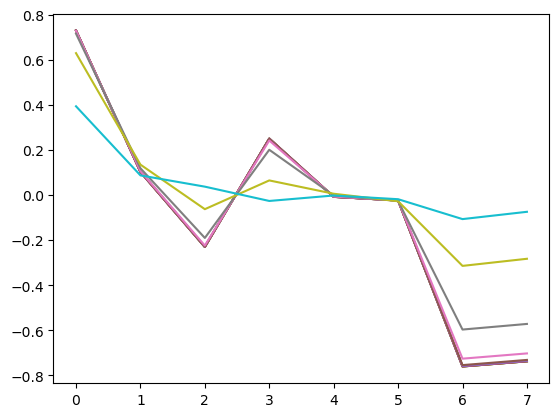

In [116]:
for i in coefs:
    plt.plot(i.T)

### Cross validation
To find the best $\lambda$ value, we should use only the train set. To evaluate the performance on unseen data without using test set, we will simulate it by splitting the train set into a new train set and a validation set used to evaluate the performance according to $\lambda$. A good practice is to repeat this split to have a better estimation of the performance. 

`sklearn` provide a class `GridSearchCV` in `sklearn.model_selection` which implements this protocol.
1. Check the documentation of `GridSearchCV`

In [117]:
from sklearn.model_selection import GridSearchCV
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

2. Define the parameters you want to test during your cross validation.

In [118]:
parameters={
    "alpha":np.logspace(-3,4,10),
    "fit_intercept":(True,False),
    "copy_X": (True, False),
    "positive":(True, False),
    "solver": ("auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs")
}

3. Run your grid search cross validation and print the MAE for test and train set. What is the  best value of $\lambda$ according to your Cross Validation ?

In [119]:
model=GridSearchCV(Ridge(),parameters)

In [120]:
model.fit(X_train_norm,y_train_norm)

/home/elnur/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1400 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/home/elnur/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/elnur/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/home/elnur/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 813, in fit
    raise ValueError(
ValueE

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 5.99484250e-03, 3.59381366e-02, 2.15443469e-01,
       1.29154967e+00, 7.74263683e+00, 4.64158883e+01, 2.78255940e+02,
       1.66810054e+03, 1.00000000e+04]),
                         'copy_X': (True, False),
                         'fit_intercept': (True, False),
                         'positive': (True, False),
                         'solver': ('auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs')})

In [121]:
model.best_params_["alpha"]

46.41588833612782

In [122]:
print(f"Train MAE: {mean_absolute_error(y_train_norm, model.predict(X_train_norm))}")
print(f"Test MAE: {mean_absolute_error(y_test_norm, model.predict(X_test_norm))}")

Train MAE: 0.4594526176446614
Test MAE: 0.46165483192845574


4. What is the criterion used by `GridSearchCV` to determine the best $\lambda$ ? Change it to fit our measure of performance, i.e. the MAE.

In [177]:
print("GridSearchCV uses these criterions:",model.best_params_)

GridSearchCV uses these criterions: {'alpha': 46.41588833612782, 'copy_X': True, 'fit_intercept': False, 'positive': False, 'solver': 'auto'}


In [178]:
ridge_new=Ridge(alpha=50,copy_X=False, fit_intercept=True, positive=True, solver="lbfgs")
ridge_new.fit(X_train_norm, y_train_norm)
y_pred_train=ridge_new.predict(X_train_norm)
print("Train MAE",mean_absolute_error(y_train_norm, y_pred_train))
y_pred_test=ridge_new.predict(X_test_norm)
print("Test MAE",mean_absolute_error(y_test_norm, y_pred_test))

Train MAE 0.5208040729092552
Test MAE 0.5243277810188491


## A full model design
Despite the choice of $\lambda$ is made without bias, the performance has been evaluated on only one split of the data. This particular split may be subject to exceptions and may not constitute a good estimation of the predictive ability of your model. The solution here is to repeat splits so as we average the performances of our model over different train and test sets.

1. Check the documentation of `ShuffleSplit` class in `sklearn.model_selection`

In [123]:
from sklearn.model_selection import ShuffleSplit
help(ShuffleSplit)

Help on class ShuffleSplit in module sklearn.model_selection._split:

class ShuffleSplit(BaseShuffleSplit)
 |  ShuffleSplit(n_splits=10, *, test_size=None, train_size=None, random_state=None)
 |  
 |  Random permutation cross-validator
 |  
 |  Yields indices to split data into training and test sets.
 |  
 |  Note: contrary to other cross-validation strategies, random splits
 |  do not guarantee that all folds will be different, although this is
 |  still very likely for sizeable datasets.
 |  
 |  Read more in the :ref:`User Guide <ShuffleSplit>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=10
 |      Number of re-shuffling & splitting iterations.
 |  
 |  test_size : float or int, default=None
 |      If float, should be between 0.0 and 1.0 and represent the proportion
 |      of the dataset to include in the test split. If int, represents the
 |      absolute number of test samples. If None, the value is set to the
 |      complement of the train size. If ``train

2. Estimate the performance of your model with 10 shuffle splits on your data. Take care to correctly normalize your data. Your code here must do everything since the beginning, ie. loading the data, splitting, cv, prediction, etc... 

In [147]:
rs = ShuffleSplit(n_splits=10, test_size=.33, random_state=0)
X_scaled=StandardScaler().fit_transform(X)
scores = [["Train score", "Test score"]]
for i, (train_index, test_index) in enumerate(rs.split(X_scaled,y)):
    ridge_rs=Ridge()
    X_train_rs, X_test_rs = X_scaled[train_index], X_scaled[test_index]
    y_train_rs, y_test_rs = y[train_index], y[test_index]
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    ridge_rs.fit(X_train_rs, y_train_rs)
    y_pred_train_rs = ridge_rs.predict(X_train_rs)
    print(f"  Train MAE: {mean_absolute_error(y_train_rs,y_pred_train_rs)}")
    y_pred_test_rs = ridge_rs.predict(X_test_rs)
    print(f"  Test MAE: {mean_absolute_error(y_test_rs,y_pred_test_rs)}")
    scores.append([mean_absolute_error(y_train_rs,y_pred_train_rs),mean_absolute_error(y_test_rs,y_pred_test_rs)])
print(scores)

Fold 0:
  Train: index=[14069 17482  7362 ...  9845 10799  2732]
  Test:  index=[14740 10101 20566 ... 16212  6944  8746]
  Train MAE: 0.5305120529578005
  Test MAE: 0.5342632063167858
Fold 1:
  Train: index=[13275  5966 15304 ...  5154 14875  2751]
  Test:  index=[ 9959 16306 17662 ...  4465  3775 17089]
  Train MAE: 0.5253541754031219
  Test MAE: 0.5388933598081989
Fold 2:
  Train: index=[ 9550  9151 16135 ...  9972  1146   747]
  Test:  index=[20340 18230 15362 ...  4357   361  8513]
  Train MAE: 0.5271310597039717
  Test MAE: 0.5334177645651994
Fold 3:
  Train: index=[19727  5450 19077 ... 14722  5851 12988]
  Test:  index=[ 5313  7640 18918 ...  6280  9648  4514]
  Train MAE: 0.5360922067185766
  Test MAE: 0.5220989338290791
Fold 4:
  Train: index=[13442  5378  3557 ...   526  6465  9283]
  Test:  index=[ 7357  4713 10050 ... 13043  2269  3193]
  Train MAE: 0.5301460051938748
  Test MAE: 0.5347483819065451
Fold 5:
  Train: index=[ 6865 18984  3873 ... 10572 16502 14054]
  Test:  i

# Lasso Regression
An alternative to Ridge Regression is the Lasso Regression ([check here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)). Lasso Regression redefines the penalization term to the L1-norm of $\mathbf{w}$. This penalization ensures a sparsity constraint on the coefficients of $\mathbf{w}$. 

1. Learn your model using a Lasso Regression, available with the class `Lasso` of module `sklearn.linear_model`.

In [148]:
from sklearn.linear_model import Lasso
help(Lasso)

Help on class Lasso in module sklearn.linear_model._coordinate_descent:

class Lasso(ElasticNet)
 |  Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso).
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Constant that multiplies the L1 term, controlling regularization
 |      strength. `alpha` must be a non-negative float i.e. in `[0, inf)`.
 |  
 |      When `alpha = 0`, the objective is equivalent to ordinary least
 |      squares, solve

2. Check the regularization path, i.e. the evolution of $\mathbf{w}$ as $\lambda$ increases. Do you see the sparsity ?


In [169]:
coefs=[]
for alpha in np.linspace(0,0.2,10):
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train_norm,y_train_norm)
    coefs.append(lasso.coef_)
coefs

/tmp/ipykernel_142383/3924293006.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train_norm,y_train_norm)
/home/elnur/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/elnur/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.692e+03, tolerance: 1.383e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[array([ 0.72993779,  0.10252163, -0.23016047,  0.25052135, -0.00792305,
        -0.02394052, -0.76030931, -0.7373548 ]),
 array([ 0.63624692,  0.11511916, -0.        ,  0.01361463, -0.        ,
        -0.0065402 , -0.5154268 , -0.48043612]),
 array([ 0.64389287,  0.12271685, -0.        ,  0.        ,  0.        ,
        -0.        , -0.20160185, -0.16684404]),
 array([ 0.6374753 ,  0.11552254, -0.        , -0.        ,  0.        ,
        -0.        , -0.02547164, -0.        ]),
 array([ 0.61406905,  0.09011078, -0.        , -0.        , -0.        ,
        -0.        , -0.00472871, -0.        ]),
 array([ 0.58929866,  0.06488322, -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        ]),
 array([ 0.5641255 ,  0.03971005, -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        ]),
 array([ 0.53895202,  0.01453684, -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        ]),
 array([ 0.51502602,  0.

3. Build and tune completly your Lasso model and compare its final performance with Ridge Regression

In [171]:
lasso=Lasso()
lasso.fit(X_train_norm, y_train_norm)
y_pred_train=lasso.predict(X_train_norm)
y_pred_test=lasso.predict(X_test_norm)
print("Train MAE for lasso: ",mean_absolute_error(y_train_norm, y_pred_train))
print("Test MAE for lasso: ",mean_absolute_error(y_test_norm, y_pred_test))

ridge=Ridge()
ridge.fit(X_train_norm, y_train_norm)
y_pred_train=ridge.predict(X_train_norm)
y_pred_test=ridge.predict(X_test_norm)
print("Train MAE for ridge: ",mean_absolute_error(y_train_norm, y_pred_train))
print("Test MAE for ridge: ",mean_absolute_error(y_test_norm, y_pred_test))

Train MAE for lasso:  0.7885621590317375
Test MAE for lasso:  0.7931669699224003
Train MAE for ridge:  0.4595601477008113
Test MAE for ridge:  0.461470085494359


# Bonus section

If you succeed to previous parts, here's some suggestions to continue and go deeper in your work:

 1. Use your implementation of Ridge Regression. Compare the computationnal times.
 
 2. Implement your own Cross Validation strategy. `sklearn` provides beautiful tools but it may be interesting to implement yourself this protocol to understand it deeply.
 
 3. Make the derivation and implement your own Lasso Regression. 
 
 4. Implement and evaluate your model on a diabetes dataset `sklearn.datasets.load_diabetes`. Take care, some columns correspond to qualitative features. [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)
 

In [180]:
import sklearn.datasets

In [182]:
X_load=sklearn.datasets.load_diabetes()["data"]
X_load

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [183]:
y_load=sklearn.datasets.load_diabetes()["target"]
y_load

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_load, y_load, test_size=0.33)

In [186]:
lasso.fit(X_train,y_train)

Lasso()

In [187]:
mean_absolute_error(y_train, lasso.predict(X_train))

51.324304021812644

In [188]:
mean_absolute_error(y_test, lasso.predict(X_test))

53.59741827324625